##Property rate- Price Predictor

In [1]:
import pandas as pd

In [9]:
housing = pd.read_csv("housing.csv")
df = pd.DataFrame(housing)


In [10]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [32]:
housing.info()
housing['mainroad'] = df['mainroad'].replace({'yes': 1, 'no': 0})
housing['guestroom'] = df['guestroom'].replace({'yes': 1, 'no': 0})
housing['hotwaterheating'] = df['hotwaterheating'].replace({'yes': 1, 'no': 0})
housing['airconditioning'] = df['airconditioning'].replace({'yes': 1, 'no': 0})
housing['prefarea'] = df['prefarea'].replace({'yes': 1, 'no': 0})
housing['furnishingstatus'] = df['furnishingstatus'].replace({'semi-furnished': 0, 'furnished': 1,'unfurnished':2})
housing['basement'] = df['prefarea'].replace({'yes': 1, 'no': 0})





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    int64 
 6   guestroom         545 non-null    int64 
 7   basement          545 non-null    int64 
 8   hotwaterheating   545 non-null    int64 
 9   airconditioning   545 non-null    int64 
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    int64 
 12  furnishingstatus  545 non-null    object
dtypes: int64(12), object(1)
memory usage: 55.5+ KB


In [33]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.234862,0.045872,0.315596,0.693578,0.234862,0.910092
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.424302,0.209399,0.465180,0.861586,0.424302,0.858130
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


In [34]:
%matplotlib inline

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'stories'}>,
        <Axes: title={'center': 'mainroad'}>,
        <Axes: title={'center': 'guestroom'}>,
        <Axes: title={'center': 'basement'}>],
       [<Axes: title={'center': 'hotwaterheating'}>,
        <Axes: title={'center': 'airconditioning'}>,
        <Axes: title={'center': 'parking'}>,
        <Axes: title={'center': 'prefarea'}>],
       [<Axes: title={'center': 'furnishingstatus'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

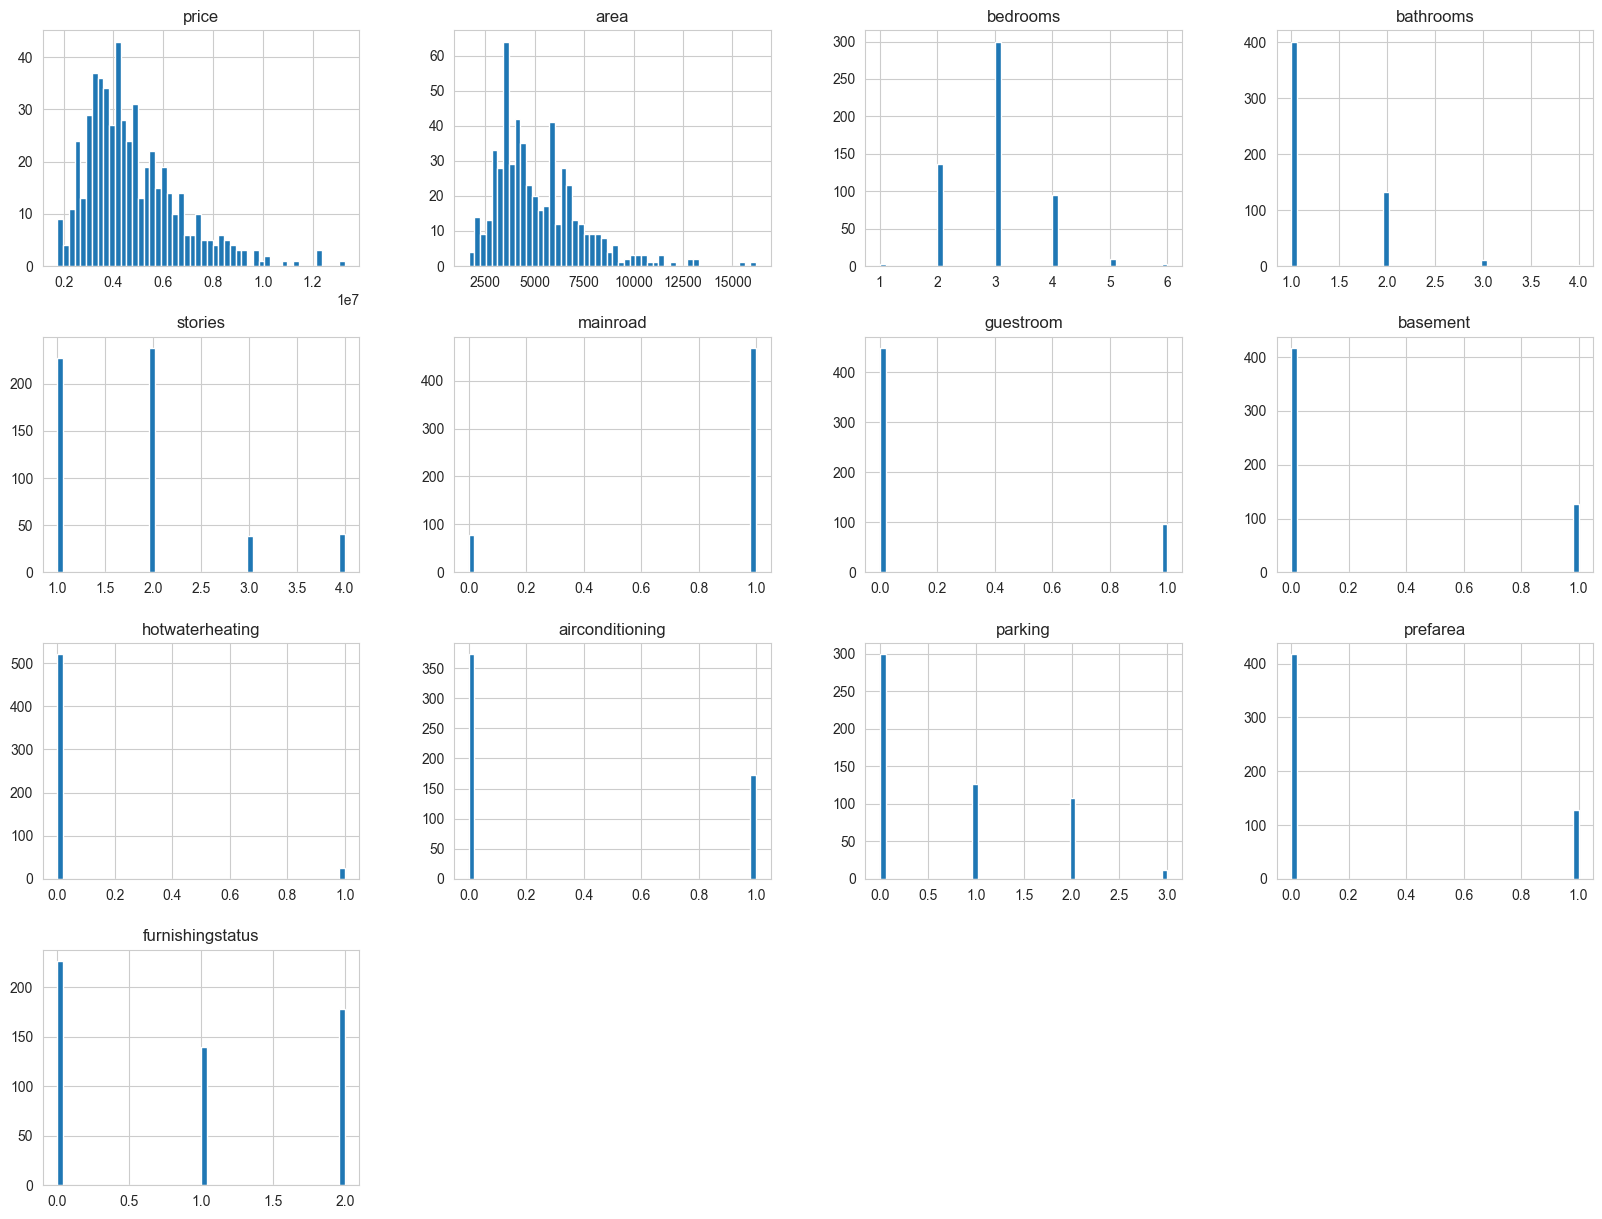

In [35]:
## For plotting histogram
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20, 15))

## Train-Test Splitting

In [36]:

import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:] 
    return data.iloc[train_indices], data.iloc[test_indices]

In [37]:
 #train_set, test_set = split_train_test(housing, 0.2)

In [38]:
# print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

In [39]:
from sklearn.model_selection import train_test_split
train_set, test_set  = train_test_split(housing, test_size=0.2, random_state=42)
for train_index, test_index in train_test_split.split(housing, housing['TravellingDaysLeft']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 436
Rows in test set: 109



In [40]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=3)
for train_index,test_index in kf.split(housing):
    print(len(train_index),"  ",len(test_index))


363    182
363    182
364    181


In [41]:
from sklearn.model_selection import StratifiedShuffleSplit


## Looking for Correlations

In [42]:
corr_matrix = housing.corr()
print(corr_matrix)
corr_matrix['price'].sort_values(ascending=False)

                     price      area  bedrooms  bathrooms   stories  mainroad  \
price             1.000000  0.535997  0.366494   0.517545  0.420712  0.296898   
area              0.535997  1.000000  0.151858   0.193820  0.083996  0.288874   
bedrooms          0.366494  0.151858  1.000000   0.373930  0.408564 -0.012033   
bathrooms         0.517545  0.193820  0.373930   1.000000  0.326165  0.042398   
stories           0.420712  0.083996  0.408564   0.326165  1.000000  0.121706   
mainroad          0.296898  0.288874 -0.012033   0.042398  0.121706  1.000000   
guestroom         0.255517  0.140297  0.080549   0.126469  0.043538  0.092337   
basement          0.329777  0.234779  0.079023   0.063472  0.044425  0.199876   
hotwaterheating   0.093073 -0.009229  0.046049   0.067159  0.018847 -0.011781   
airconditioning   0.452954  0.222393  0.160603   0.186915  0.293602  0.105423   
parking           0.384394  0.352980  0.139270   0.177496  0.045547  0.204433   
prefarea          0.329777  

price               1.000000
area                0.535997
bathrooms           0.517545
airconditioning     0.452954
stories             0.420712
parking             0.384394
bedrooms            0.366494
basement            0.329777
prefarea            0.329777
mainroad            0.296898
guestroom           0.255517
hotwaterheating     0.093073
furnishingstatus   -0.190086
Name: price, dtype: float64

array([[<Axes: xlabel='price', ylabel='price'>,
        <Axes: xlabel='area', ylabel='price'>,
        <Axes: xlabel='bathrooms', ylabel='price'>,
        <Axes: xlabel='stories', ylabel='price'>],
       [<Axes: xlabel='price', ylabel='area'>,
        <Axes: xlabel='area', ylabel='area'>,
        <Axes: xlabel='bathrooms', ylabel='area'>,
        <Axes: xlabel='stories', ylabel='area'>],
       [<Axes: xlabel='price', ylabel='bathrooms'>,
        <Axes: xlabel='area', ylabel='bathrooms'>,
        <Axes: xlabel='bathrooms', ylabel='bathrooms'>,
        <Axes: xlabel='stories', ylabel='bathrooms'>],
       [<Axes: xlabel='price', ylabel='stories'>,
        <Axes: xlabel='area', ylabel='stories'>,
        <Axes: xlabel='bathrooms', ylabel='stories'>,
        <Axes: xlabel='stories', ylabel='stories'>]], dtype=object)

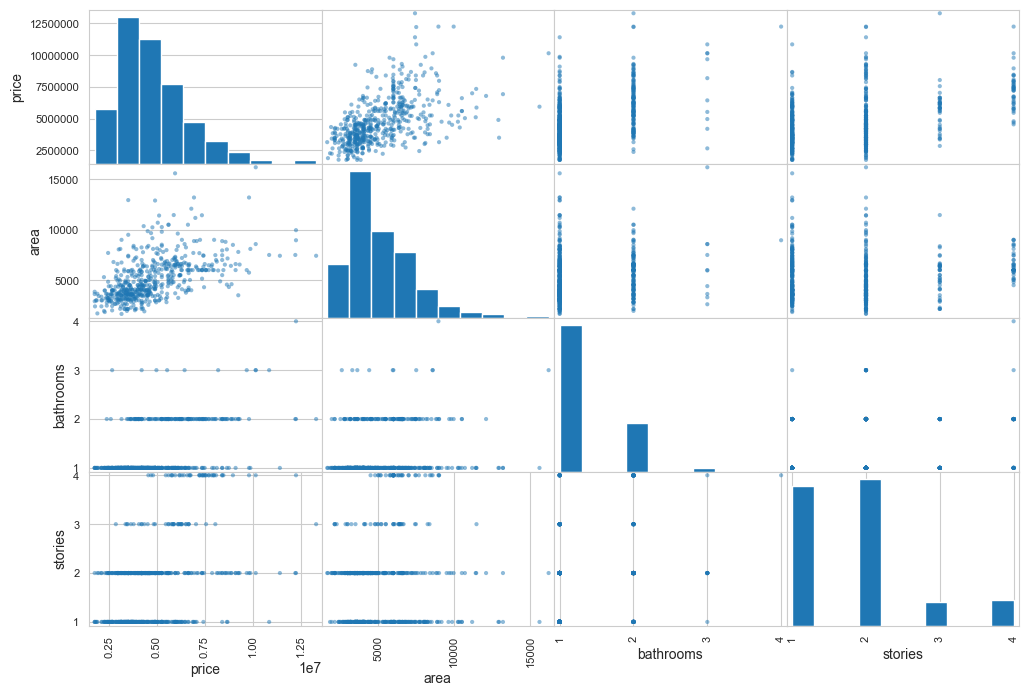

In [43]:
from pandas.plotting import scatter_matrix
attributes = ["price", "area", "bathrooms", "stories"]
scatter_matrix(housing[attributes], figsize = (12,8))

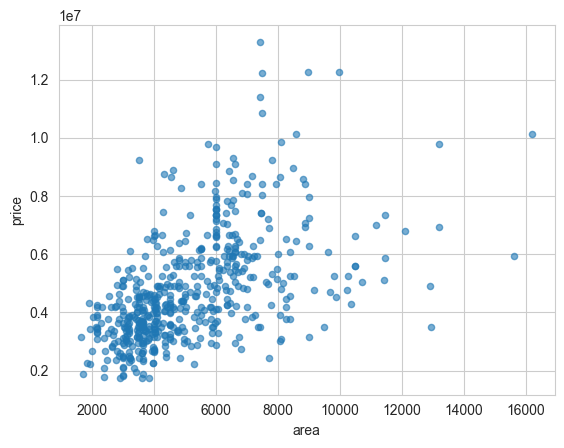

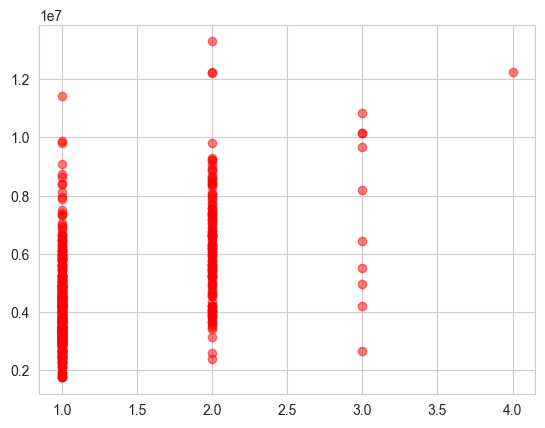

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
housing.plot(kind="scatter", x="area", y="price", alpha=0.6)
plt.show()
plt.scatter(housing['bathrooms'],housing['price'],c='r',alpha=0.5)
plt.show()

## Analysing the combinations

In [ ]:
housing.head()

In [ ]:
corr_matrix = housing.corr()
corr_matrix['Price'].sort_values(ascending=False)

In [ ]:
housing.plot(kind="scatter", x="TAXRM", y="MEDV", alpha=0.8)

In [ ]:
housing = strat_train_set.drop("Price", axis=1)
housing_labels = strat_train_set["Price"].copy()
print(housing_labels)

##  Finding Missing Attributes

In [ ]:
housing.shape

In [ ]:
housing.describe() # before we started filling missing attributes

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(housing)

In [ ]:
imputer.statistics_

In [ ]:
X = imputer.transform(housing)
print(X)

In [ ]:
housing_tr = pd.DataFrame(X, columns=housing.columns)      #comverting the numpy array type x to the dataFrame

In [ ]:
housing_tr.describe()

## Using Scikit learning
## three steps: Estimators-Transform-Predictors
LinearRegression model is an example of predictor. fit() and predict() are two common functions. It also gives score() function which will evaluate the predictions.

## Feature Scaling

Primarily, two types of feature scaling methods:
1. Min-max scaling (Normalization)
    (value - min)/(max - min)
    Sklearn provides a class called MinMaxScaler for this
    
2. Standardization
    (value - mean)/std
    Sklearn provides a class called StandardScaler for this
    
    
    
    
    
    these are done for every columns of the dataframe or array


## Creating a Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    #     ..... add as many as you want in your pipeline
    ('std_scaler', StandardScaler()),
])


In [ ]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [ ]:
housing_num_tr.shape
print(housing_num_tr)

## Analysing different models for predicting rates

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression()
model = DecisionTreeRegressor()
#model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)
# print(model.coef_)
# print(model.intercept_)

In [ ]:
some_data = housing.iloc[:5]
some_data

In [ ]:
some_labels = housing_labels.iloc[:5]
some_labels

In [ ]:
prepared_data = my_pipeline.transform(some_data)
prepared_data

In [ ]:
model.predict(prepared_data)

In [ ]:
list(some_labels)

## Evaluating the model

In [ ]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)
print(mse)

In [ ]:
rmse

## Using better evaluation technique - Cross Validation

In [ ]:
# 1 2 3 4 5 6 7 8 9 10
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [ ]:
rmse_scores

In [ ]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [ ]:
print_scores(rmse_scores)

## Saving the model

In [ ]:
arg=(model,my_pipeline)
from joblib import dump, load
dump(arg, 'Property.joblib')

## Testing the model on test data

In [ ]:
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_predictions, list(Y_test))

In [ ]:
final_rmse

In [ ]:
prepared_data

## Using the model

In [ ]:
from joblib import dump, load
import numpy as np
model,pipe = load('Property.joblib')
features = np.array([[-5.43942006, 4.12628155, -1.6165014, -0.67288841, -1.42262747,
       -11.44443979304, -49.31238772,  7.61111401, -26.0016879 , -0.5778192 ,
       -0.97491834,  0.41164221, -66.86091034]])
model.predict(features)

In [ ]:
a=np.array([[4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68]])
X_test_prepared = my_pipeline.transform(a)
print(X_test_prepared)
final_predictions = model.predict(X_test_prepared)
print(final_predictions)